In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder




In [3]:
## loading the file
health_care = pd.read_csv('../healthcare/train_data.csv')

In [4]:
## Checking the data
for column in health_care.columns :
    print(column)

case_id
Hospital_code
Hospital_type_code
City_Code_Hospital
Hospital_region_code
Available Extra Rooms in Hospital
Department
Ward_Type
Ward_Facility_Code
Bed Grade
patientid
City_Code_Patient
Type of Admission
Severity of Illness
Visitors with Patient
Age
Admission_Deposit
Stay


In [5]:
health_care.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [6]:
health_care.shape

(318438, 18)

In [7]:
## Checking target
target = health_care['Stay']
print(pd.unique(target))


['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']


In [8]:
## Encoding data
encoder = LabelEncoder()
target_enc = encoder.fit_transform(target)


In [9]:
sorted_target = pd.unique(target)
sorted_target.sort()
order = sorted_target.tolist()
order

['0-10',
 '11-20',
 '21-30',
 '31-40',
 '41-50',
 '51-60',
 '61-70',
 '71-80',
 '81-90',
 '91-100',
 'More than 100 Days']

In [10]:
for column in health_care.columns :
    x = pd.unique(health_care[column])
    print(f'number of unique elements of  {column} is : {len(x)}')

number of unique elements of  case_id is : 318438
number of unique elements of  Hospital_code is : 32
number of unique elements of  Hospital_type_code is : 7
number of unique elements of  City_Code_Hospital is : 11
number of unique elements of  Hospital_region_code is : 3
number of unique elements of  Available Extra Rooms in Hospital is : 18
number of unique elements of  Department is : 5
number of unique elements of  Ward_Type is : 6
number of unique elements of  Ward_Facility_Code is : 6
number of unique elements of  Bed Grade is : 5
number of unique elements of  patientid is : 92017
number of unique elements of  City_Code_Patient is : 38
number of unique elements of  Type of Admission is : 3
number of unique elements of  Severity of Illness is : 3
number of unique elements of  Visitors with Patient is : 28
number of unique elements of  Age is : 10
number of unique elements of  Admission_Deposit is : 7300
number of unique elements of  Stay is : 11


In [11]:
df = health_care[health_care['Stay']=='51-60']

In [17]:
# Dropping case_id
df.drop(['case_id', 'Bed Grade', 'patientid', 'Stay', 'Admission_Deposit'], axis=1, inplace=True)

/Users/baraa/opt/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df[:50]

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age
8,1,d,10,Y,2,gynecology,R,B,7.0,Trauma,Extreme,2,51-60
30,27,a,7,Y,3,gynecology,R,C,2.0,Urgent,Moderate,4,31-40
43,19,a,7,Y,6,gynecology,Q,C,8.0,Emergency,Moderate,3,31-40
44,21,c,3,Z,2,gynecology,S,A,8.0,Emergency,Moderate,3,31-40
47,6,a,6,X,2,gynecology,R,F,2.0,Emergency,Extreme,4,51-60
49,23,a,6,X,2,TB & Chest disease,R,F,2.0,Emergency,Extreme,4,51-60
62,31,c,3,Z,2,gynecology,R,A,6.0,Emergency,Moderate,4,81-90
79,15,c,5,Z,3,gynecology,Q,F,4.0,Trauma,Minor,3,41-50
80,15,c,5,Z,2,gynecology,S,F,4.0,Trauma,Minor,3,41-50
102,21,c,3,Z,3,gynecology,S,A,8.0,Trauma,Moderate,4,61-70


# Data Analysis

In [9]:
## functions to feed to barplot
def mean(x):
    return np.mean(x)

def median(x):
    return np.median(x)

def std(x):
    return np.std(x)


In [115]:
## Estimate of length of stay
target_estimate = 10* (target_enc) + 5
    
health_care['Stay Estimate'] = target_estimate


In [127]:
## Feature with limited classes to study
elements_to_remove = ['case_id', 'patientid', 'Admission_Deposit', 'Stay', 'Stay Estimate']
column_features = [ column for column in health_care.columns if column not in elements_to_remove]
print(column_features)

['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age']


## Mean Analysis

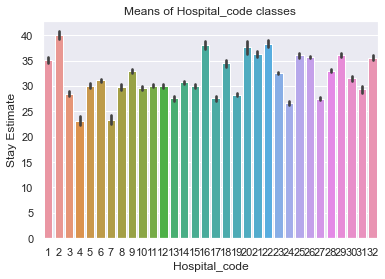

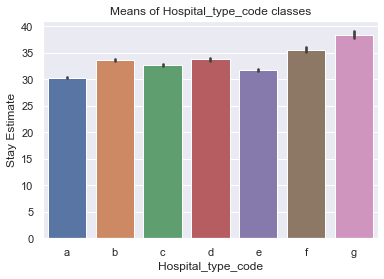

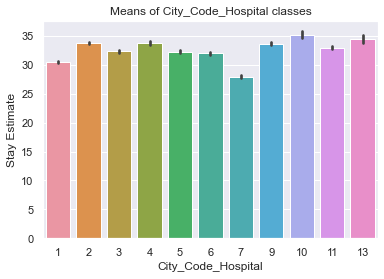

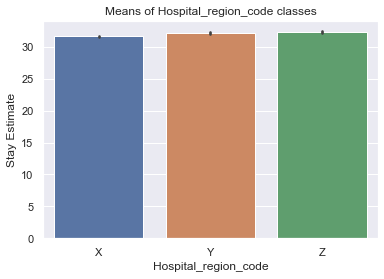

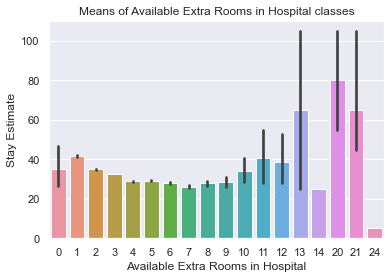

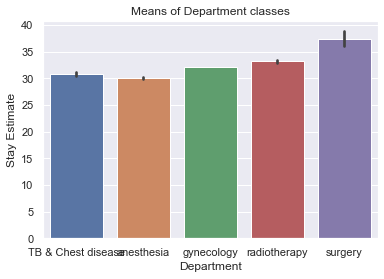

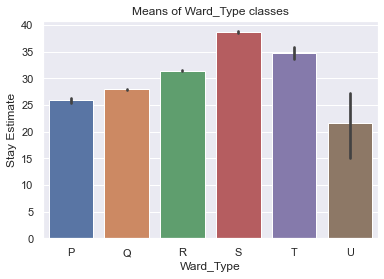

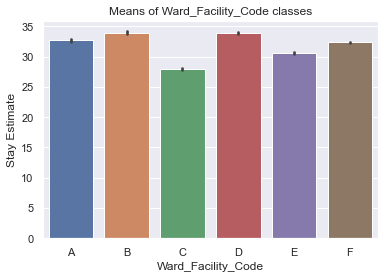

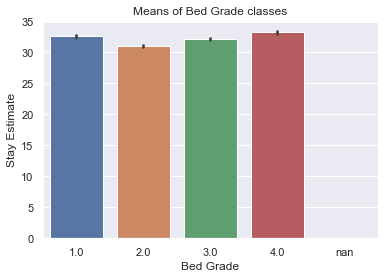

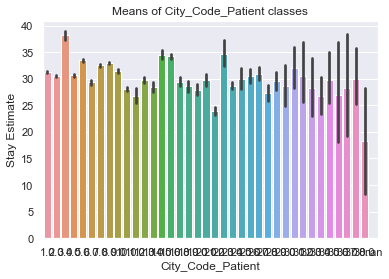

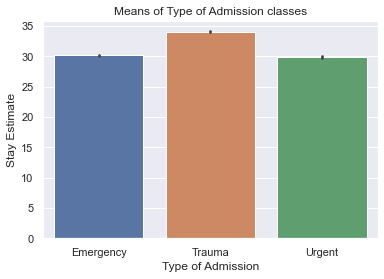

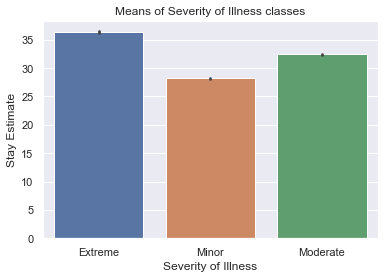

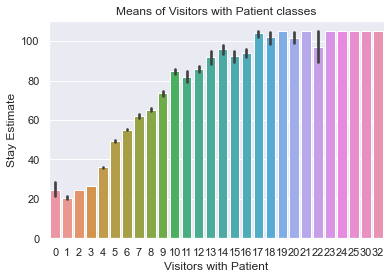

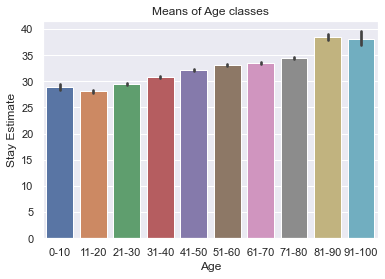

In [128]:
for feature in column_features :
    order = pd.unique(health_care[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=health_care,order=order, estimator=mean)
    ax.set_title(f'Means of {feature} classes') 
    plt.show();
    
    
    
    

## Conclusion :

Feature that appear to have some influence on the mean of the stay : 
- Hospital_code
- Available Extra Room : To verifiy if the amount of available data is conclusive 
- Ward_Type
- City_Code_Patient
- Type Of Admission
- Severity of Illness
- Visitors with Patient : To verify since maybe it's correlated to the length of stay
- Age

## Median Analysis


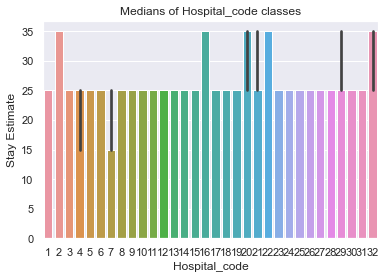

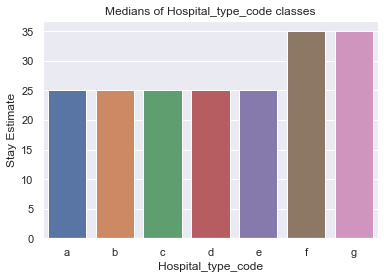

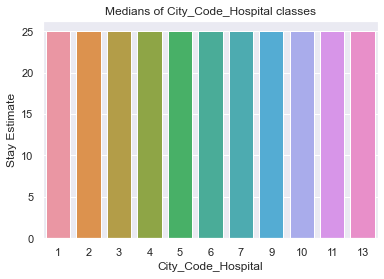

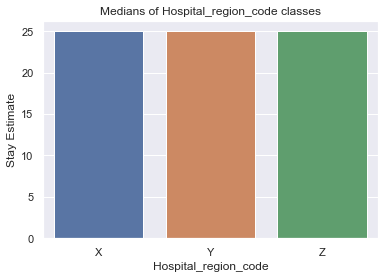

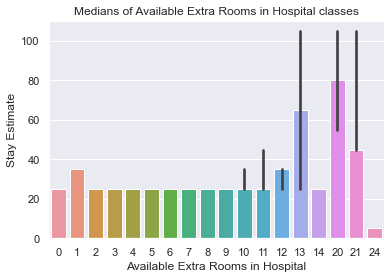

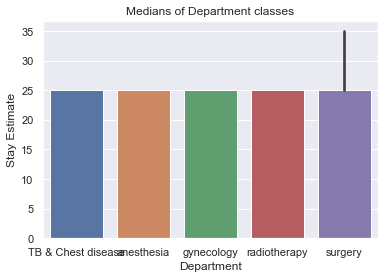

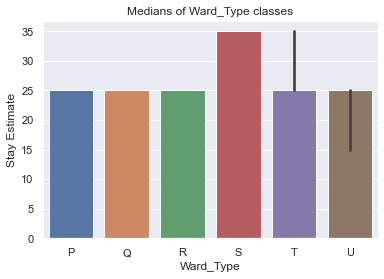

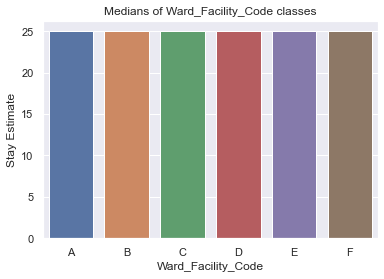

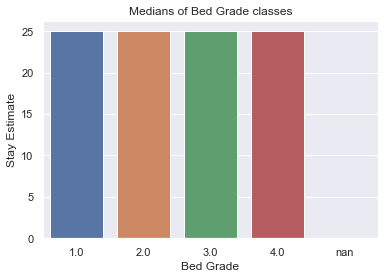

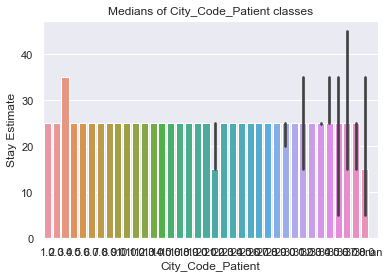

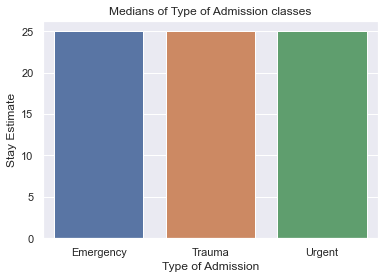

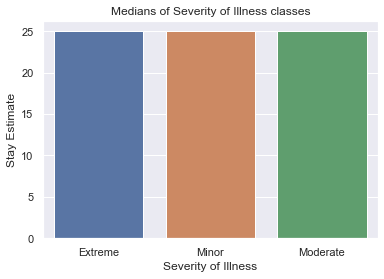

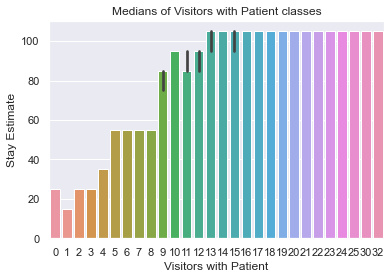

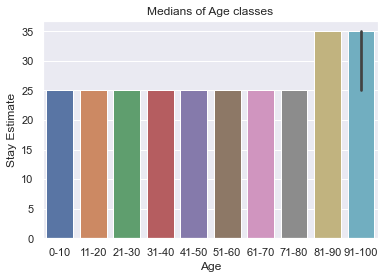

In [130]:
for feature in column_features :
    order = pd.unique(health_care[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=health_care,order=order, estimator=median)
    ax.set_title(f'Medians of {feature} classes') 
    plt.show();
    
    
    
    

## Conclusion :

Feature that appear to have some influence on the median of the stay : 
- Hospital_code
- Hospital_type_code
- Available Extra Room : To verifiy if the amount of available data is conclusive 
- Ward_Type
- City_Code_Patient
- Visitors with Patient : To verify since maybe it's correlated to the length of stay
- Age

## Analysis of Std

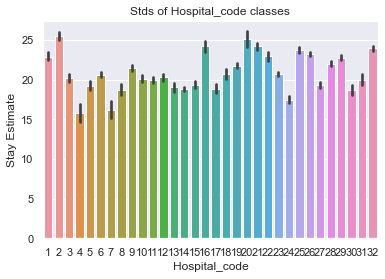

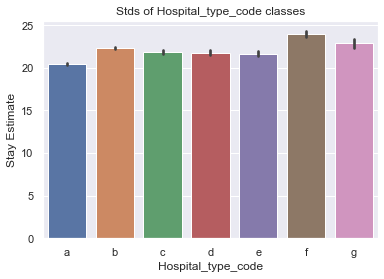

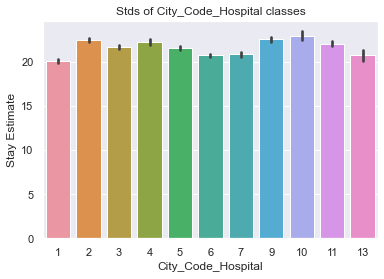

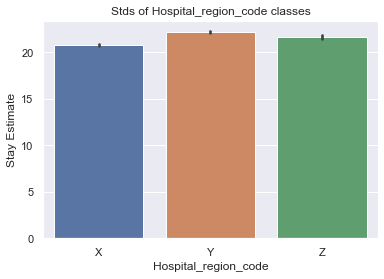

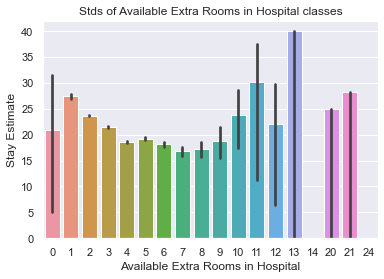

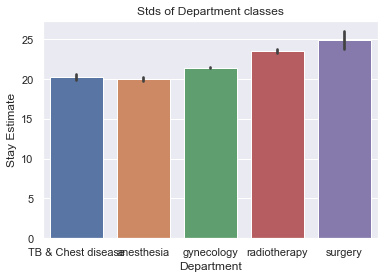

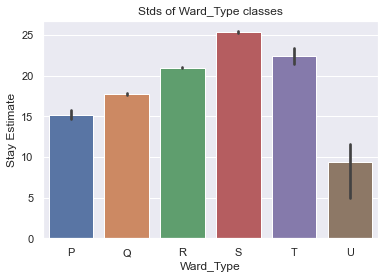

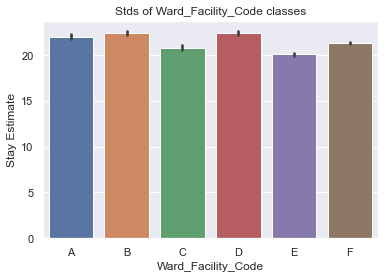

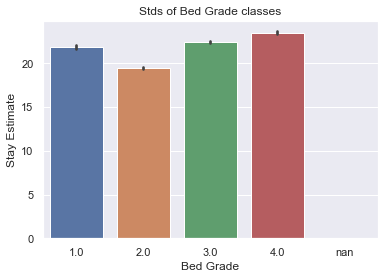

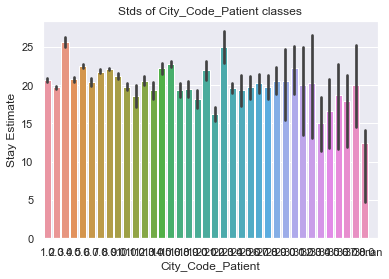

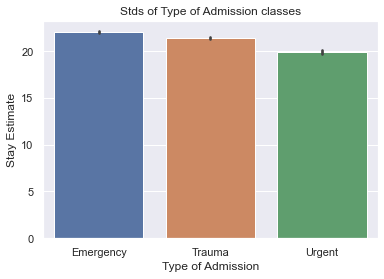

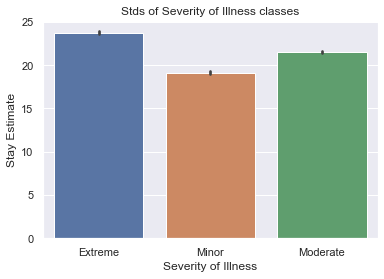

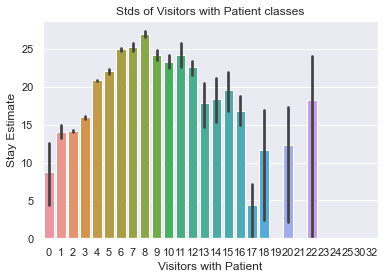

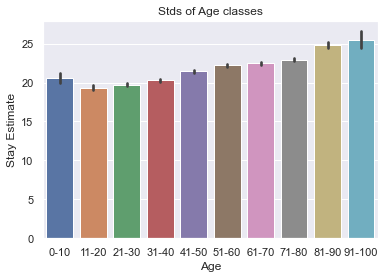

In [131]:
for feature in column_features :
    order = pd.unique(health_care[feature])
    order.sort()
    ax = sns.barplot(x=feature, y="Stay Estimate", data=health_care,order=order, estimator=std)
    ax.set_title(f'Stds of {feature} classes') 
    plt.show();
    
    
    
    

## Conclusion :

Feature that appear to have some influence on the median of the stay : 
- Hospital_code
- Available Extra Room : To verifiy if the amount of available data is conclusive 
- Ward_Type
- City_Code_Patient
- Severity of Illness
- Type Of Admission
- Visitors with Patient : To verify since maybe it's correlated to the length of stay
- Age

## Checking the relationship between some features and the target

The features that intuitively appear to be important are : 
1. Type of Admission
2. Severity of Illness
3. Age


### Type of Admission Analysis

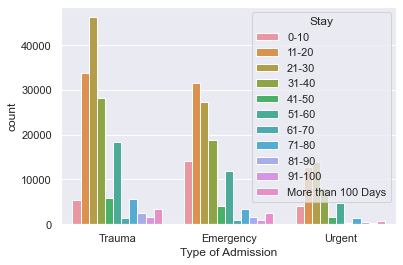

In [91]:
sns.set_theme(style="darkgrid")


ax = sns.countplot(x="Type of Admission", hue="Stay", order =['Trauma',  'Emergency','Urgent'], hue_order=order, data=health_care)


In [9]:
type_of_admission = ['Trauma', 'Urgent', 'Emergency']

for c in type_of_admission : 
    print('The mean of stay when the type of admission if {} is approximately : {:.2f} days'.format(c,10*target_enc[health_care['Type of Admission']==c].mean() + 5))


The mean of stay when the type of admission if Trauma is approximately : 34.05 days
The mean of stay when the type of admission if Urgent is approximately : 29.89 days
The mean of stay when the type of admission if Emergency is approximately : 30.17 days


In [10]:
for c in type_of_admission : 
    print('The std of stay when the type of admission if {} is approximately : {:.2f} days'.format(c,10*target_enc[health_care['Type of Admission']==c].std() + 5))


The std of stay when the type of admission if Trauma is approximately : 26.40 days
The std of stay when the type of admission if Urgent is approximately : 24.91 days
The std of stay when the type of admission if Emergency is approximately : 27.01 days


Type of Admission doesnt appear to have a big impact on length of stay

### Severity of Ilness Analysis

In [92]:
severity = health_care['Severity of Illness']
print(pd.unique(severity))

                       

['Extreme' 'Moderate' 'Minor']


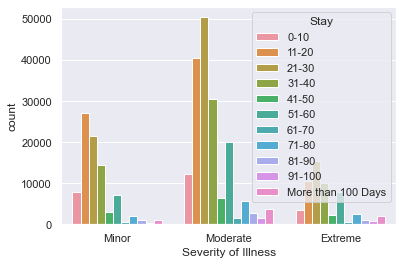

In [93]:
ax = sns.countplot(x="Severity of Illness", hue="Stay", order =['Minor',  'Moderate','Extreme'], hue_order=order, data=health_care)


In [94]:
severity_of_illness = ['Minor', 'Moderate', 'Extreme']

for c in severity_of_illness : 
    print('The mean of stay when the severity of illness if {} is approximately : {:.2f} days'.format(c,10*target_enc[health_care['Severity of Illness']==c].mean() + 5))


The mean of stay when the severity of illness if Minor is approximately : 28.18 days
The mean of stay when the severity of illness if Moderate is approximately : 32.45 days
The mean of stay when the severity of illness if Extreme is approximately : 36.31 days


In [95]:
for c in severity_of_illness : 
    print('The std of stay when the severity of Illness if {} is approximately : {:.2f} days'.format(c,10*target_enc[health_care['Severity of Illness']==c].std() + 5))


The std of stay when the severity of Illness if Minor is approximately : 24.14 days
The std of stay when the severity of Illness if Moderate is approximately : 26.52 days
The std of stay when the severity of Illness if Extreme is approximately : 28.75 days


Severity of Illness does appear to have an impact on the length of stay

### Age analysis

In [39]:
age = health_care['Age']
print(pd.unique(age))

                       

['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100']


In [42]:
age_order = pd.unique(age)
age_order.sort()
print(age_order)

['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100']


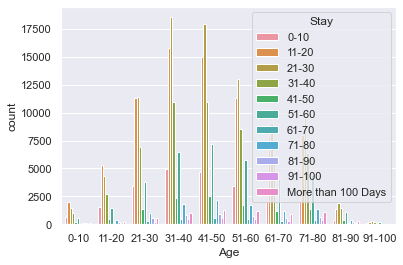

In [43]:
ax = sns.countplot(x="Age", hue="Stay", order =age_order, hue_order=order, data=health_care)


In [44]:
for c in age_order : 
    print('The mean of stay when age range is  {} is approximately : {:.2f} days'.format(c,10*target_enc[health_care['Age']==c].mean() + 5))


The mean of stay when age range is  0-10 is approximately : 28.91 days
The mean of stay when age range is  11-20 is approximately : 28.07 days
The mean of stay when age range is  21-30 is approximately : 29.48 days
The mean of stay when age range is  31-40 is approximately : 30.76 days
The mean of stay when age range is  41-50 is approximately : 32.21 days
The mean of stay when age range is  51-60 is approximately : 33.08 days
The mean of stay when age range is  61-70 is approximately : 33.55 days
The mean of stay when age range is  71-80 is approximately : 34.41 days
The mean of stay when age range is  81-90 is approximately : 38.40 days
The mean of stay when age range is  91-100 is approximately : 38.16 days


In [45]:
for c in age_order : 
    print('The std of stay when age range is  {} is approximately : {:.2f} days'.format(c,10*target_enc[health_care['Age']==c].std() + 5))


The std of stay when age range is  0-10 is approximately : 25.58 days
The std of stay when age range is  11-20 is approximately : 24.31 days
The std of stay when age range is  21-30 is approximately : 24.73 days
The std of stay when age range is  31-40 is approximately : 25.28 days
The std of stay when age range is  41-50 is approximately : 26.44 days
The std of stay when age range is  51-60 is approximately : 27.24 days
The std of stay when age range is  61-70 is approximately : 27.47 days
The std of stay when age range is  71-80 is approximately : 27.93 days
The std of stay when age range is  81-90 is approximately : 29.84 days
The std of stay when age range is  91-100 is approximately : 30.44 days


Age does appear to have some impact on the length of stay

### Hospital code Analysis

In [54]:
hospital_code = pd.unique(health_care['Hospital_code'])
hospital_code.sort()
for c in hospital_code : 
    print('The mean of stay when hospital code is  {} is approximately : {:.2f} days'.format(c,10*target_enc[health_care['Hospital_code']==c].mean() + 5))


The mean of stay when hospital code is  1 is approximately : 35.15 days
The mean of stay when hospital code is  2 is approximately : 40.03 days
The mean of stay when hospital code is  3 is approximately : 28.45 days
The mean of stay when hospital code is  4 is approximately : 23.13 days
The mean of stay when hospital code is  5 is approximately : 30.08 days
The mean of stay when hospital code is  6 is approximately : 31.13 days
The mean of stay when hospital code is  7 is approximately : 23.34 days
The mean of stay when hospital code is  8 is approximately : 29.82 days
The mean of stay when hospital code is  9 is approximately : 32.87 days
The mean of stay when hospital code is  10 is approximately : 29.70 days
The mean of stay when hospital code is  11 is approximately : 29.99 days
The mean of stay when hospital code is  12 is approximately : 30.05 days
The mean of stay when hospital code is  13 is approximately : 27.55 days
The mean of stay when hospital code is  14 is approximately 

['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age']


## Mean and Std stat for features with limited number of classes

In [64]:
for column in column_features :
    unique = pd.unique(health_care[column])
    unique.sort()
    
    
    print(' Mean Statistic : ')    
    for c in unique : 
        print('The mean of stay when for {} in the feature {} is approximately : {:.2f} days'.format(c, column, 10*target_enc[health_care[column]==c].mean() + 5))
    print('-------')
    
    print(' Madian Statistic : ')    
    for c in unique : 
        print('The Median of stay when for {} in the feature {} is approximately : {:.2f} days'.format(c, column, 10*np.median(target_enc[health_care[column]==c]) + 5))
    print('---------------------------------------------------------------------------------------------------------')
    
    print(' Std Statistic : ')    
    for c in unique : 
        print('The Std of stay when for {} in the feature {} is approximately : {:.2f} days'.format(c, column, 10*target_enc[health_care[column]==c].std() + 5))
    print('---------------------------------------------------------------------------------------------------------')
        
    

    

 Mean Statistic : 
The mean of stay when for 1 in the feature Hospital_code is approximately : 35.15 days
The mean of stay when for 2 in the feature Hospital_code is approximately : 40.03 days
The mean of stay when for 3 in the feature Hospital_code is approximately : 28.45 days
The mean of stay when for 4 in the feature Hospital_code is approximately : 23.13 days
The mean of stay when for 5 in the feature Hospital_code is approximately : 30.08 days
The mean of stay when for 6 in the feature Hospital_code is approximately : 31.13 days
The mean of stay when for 7 in the feature Hospital_code is approximately : 23.34 days
The mean of stay when for 8 in the feature Hospital_code is approximately : 29.82 days
The mean of stay when for 9 in the feature Hospital_code is approximately : 32.87 days
The mean of stay when for 10 in the feature Hospital_code is approximately : 29.70 days
The mean of stay when for 11 in the feature Hospital_code is approximately : 29.99 days
The mean of stay when 

The Median of stay when for a in the feature Hospital_type_code is approximately : 25.00 days
The Median of stay when for b in the feature Hospital_type_code is approximately : 25.00 days
The Median of stay when for c in the feature Hospital_type_code is approximately : 25.00 days
The Median of stay when for d in the feature Hospital_type_code is approximately : 25.00 days
The Median of stay when for e in the feature Hospital_type_code is approximately : 25.00 days
The Median of stay when for f in the feature Hospital_type_code is approximately : 35.00 days
The Median of stay when for g in the feature Hospital_type_code is approximately : 35.00 days
---------------------------------------------------------------------------------------------------------
 Std Statistic : 
The Std of stay when for a in the feature Hospital_type_code is approximately : 25.48 days
The Std of stay when for b in the feature Hospital_type_code is approximately : 27.34 days
The Std of stay when for c in the fe

The Std of stay when for TB & Chest disease in the feature Department is approximately : 25.26 days
The Std of stay when for anesthesia in the feature Department is approximately : 25.04 days
The Std of stay when for gynecology in the feature Department is approximately : 26.44 days
The Std of stay when for radiotherapy in the feature Department is approximately : 28.50 days
The Std of stay when for surgery in the feature Department is approximately : 29.87 days
---------------------------------------------------------------------------------------------------------
 Mean Statistic : 
The mean of stay when for P in the feature Ward_Type is approximately : 25.90 days
The mean of stay when for Q in the feature Ward_Type is approximately : 27.93 days
The mean of stay when for R in the feature Ward_Type is approximately : 31.49 days
The mean of stay when for S in the feature Ward_Type is approximately : 38.68 days
The mean of stay when for T in the feature Ward_Type is approximately : 34.8

<ipython-input-64-97f0e97244db>:8: RuntimeWarning: Mean of empty slice.
  print('The mean of stay when for {} in the feature {} is approximately : {:.2f} days'.format(c, column, 10*target_enc[health_care[column]==c].mean() + 5))
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: inva

The Median of stay when for nan in the feature Bed Grade is approximately : nan days
---------------------------------------------------------------------------------------------------------
 Std Statistic : 
The Std of stay when for 1.0 in the feature Bed Grade is approximately : 26.87 days
The Std of stay when for 2.0 in the feature Bed Grade is approximately : 24.47 days
The Std of stay when for 3.0 in the feature Bed Grade is approximately : 27.42 days
The Std of stay when for 4.0 in the feature Bed Grade is approximately : 28.50 days
The Std of stay when for nan in the feature Bed Grade is approximately : nan days
---------------------------------------------------------------------------------------------------------
 Mean Statistic : 
The mean of stay when for 1.0 in the feature City_Code_Patient is approximately : 31.29 days
The mean of stay when for 2.0 in the feature City_Code_Patient is approximately : 30.53 days
The mean of stay when for 3.0 in the feature City_Code_Patient

<ipython-input-64-97f0e97244db>:8: RuntimeWarning: Mean of empty slice.
  print('The mean of stay when for {} in the feature {} is approximately : {:.2f} days'.format(c, column, 10*target_enc[health_care[column]==c].mean() + 5))
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: inva

The Median of stay when for Urgent in the feature Type of Admission is approximately : 25.00 days
---------------------------------------------------------------------------------------------------------
 Std Statistic : 
The Std of stay when for Emergency in the feature Type of Admission is approximately : 27.01 days
The Std of stay when for Trauma in the feature Type of Admission is approximately : 26.40 days
The Std of stay when for Urgent in the feature Type of Admission is approximately : 24.91 days
---------------------------------------------------------------------------------------------------------
 Mean Statistic : 
The mean of stay when for Extreme in the feature Severity of Illness is approximately : 36.31 days
The mean of stay when for Minor in the feature Severity of Illness is approximately : 28.18 days
The mean of stay when for Moderate in the feature Severity of Illness is approximately : 32.45 days
-------
 Madian Statistic : 
The Median of stay when for Extreme in t

The mean of stay when for 81-90 in the feature Age is approximately : 38.40 days
The mean of stay when for 91-100 in the feature Age is approximately : 38.16 days
-------
 Madian Statistic : 
The Median of stay when for 0-10 in the feature Age is approximately : 25.00 days
The Median of stay when for 11-20 in the feature Age is approximately : 25.00 days
The Median of stay when for 21-30 in the feature Age is approximately : 25.00 days
The Median of stay when for 31-40 in the feature Age is approximately : 25.00 days
The Median of stay when for 41-50 in the feature Age is approximately : 25.00 days
The Median of stay when for 51-60 in the feature Age is approximately : 25.00 days
The Median of stay when for 61-70 in the feature Age is approximately : 25.00 days
The Median of stay when for 71-80 in the feature Age is approximately : 25.00 days
The Median of stay when for 81-90 in the feature Age is approximately : 35.00 days
The Median of stay when for 91-100 in the feature Age is appro